# CSC494 - Final Project
## American Sign Language Recognizer

# Dataset

In [1]:
import os
import numpy as np
dataset_dir = f'{os.getcwd()}/../dataset'
path_to_training = f'{dataset_dir}/asl_alphabet_train/asl_alphabet_train/'
path_to_testing = f'{dataset_dir}/asl_alphabet_test/asl_alphabet_test/' # Lets use this for blind testing (i.e. the images were not used to validate during the training process)

f'[Path to training exists >> {os.path.exists(path_to_training)}]' \
f'[Path to testing exists >> {os.path.exists(path_to_testing)}]'

'[Path to training exists >> True][Path to testing exists >> True]'

In [2]:
categories = [f.name for f in os.scandir(path_to_training)]
categories

['A',
 'B',
 'C',
 'D',
 'del',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'nothing',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'space',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

Found 60900 images belonging to 29 classes.
Found 26100 images belonging to 29 classes.


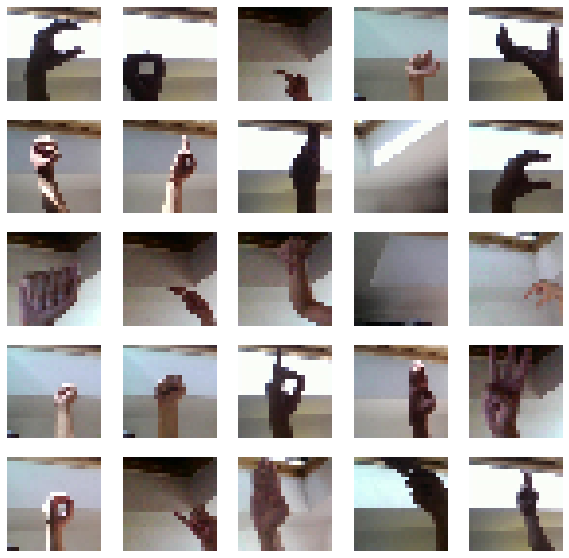

In [3]:
from image_cnn import ASLClassifier
asl_clf = ASLClassifier()
asl_clf.load_dataset(path_to_training, img_shape=(24, 24, 3))
asl_clf.display_25_img()

In [4]:
asl_clf.compile_model()

In [5]:
asl_clf.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

In [6]:
print(asl_clf.train_set)
print(asl_clf.test_set)

In [7]:
asl_history = asl_clf.train(epochs=2)

Epoch 1/2
1904/1904 [==============================] - 57s 30ms/step - loss: 1.3162 - accuracy: 0.5865 - val_loss: 1.5376 - val_accuracy: 0.5433
Epoch 2/2
1904/1904 [==============================] - 57s 30ms/step - loss: 0.4041 - accuracy: 0.8629 - val_loss: 1.5024 - val_accuracy: 0.5998


In [8]:
prediction = asl_clf.model.predict(asl_clf.test_set)

In [9]:
prediction

array([[1.0000000e+00, 2.9094014e-01, 4.4196645e-06, ..., 1.5244883e-07,
        7.8809145e-18, 9.8630004e-10],
       [1.0000000e+00, 3.3578396e-02, 1.9648969e-03, ..., 2.5861773e-06,
        2.3912531e-17, 5.8369869e-09],
       [1.0000000e+00, 6.3634066e-06, 5.6503733e-08, ..., 1.8788139e-10,
        6.6754168e-19, 7.3872616e-07],
       ...,
       [7.5644255e-04, 2.4264265e-05, 3.6897063e-03, ..., 1.5456447e-01,
        2.1625549e-02, 6.3061380e-01],
       [6.2519312e-04, 2.7310203e-05, 2.8334558e-03, ..., 5.0625956e-01,
        1.2016296e-03, 9.6436584e-01],
       [5.7253242e-04, 2.0477213e-05, 1.4480054e-03, ..., 4.3455973e-01,
        1.2156367e-03, 9.7700274e-01]], dtype=float32)

In [10]:
asl_pred = prediction > 0.5

In [11]:
asl_pred

array([[ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False,  True],
       [False, False, False, ...,  True, False,  True],
       [False, False, False, ..., False, False,  True]])

In [12]:
asl_clf.performance_report(asl_pred)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

array([ 0,  0,  0, ..., 28, 28, 28])